In [2]:
# packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm  #support vector machin

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1)

%matplotlib inline

In [3]:
recipes = pd.read_csv("Cupcakes vs Muffins.csv")
print(recipes)

       Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0    Muffin     55    28      3       7    5              2        0     0
1    Muffin     47    24     12       6    9              1        0     0
2    Muffin     47    23     18       6    4              1        0     0
3    Muffin     45    11     17      17    8              1        0     0
4    Muffin     50    25     12       6    5              2        1     0
5    Muffin     55    27      3       7    5              2        1     0
6    Muffin     54    27      7       5    5              2        0     0
7    Muffin     47    26     10      10    4              1        0     0
8    Muffin     50    17     17       8    6              1        0     0
9    Muffin     50    17     17      11    4              1        0     0
10  Cupcake     39     0     26      19   14              1        1     0
11  Cupcake     42    21     16      10    8              3        0     0
12  Cupcake     34    17 

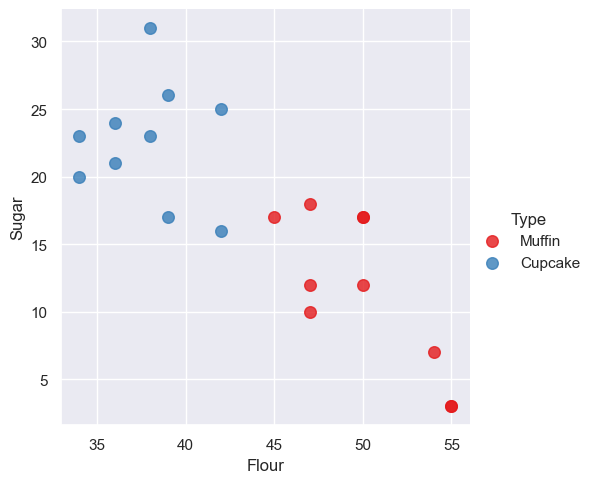

In [4]:
# plot data
sns.lmplot(x="Flour", y="Sugar", data=recipes, hue="Type", palette="Set1", fit_reg=False, scatter_kws={"s": 70})


In [5]:
# format data
type_label = np.where(recipes["Type"] == "Muffin", 0, 1)
print(type_label)
recipe_features = recipes.columns.values[1:].tolist()
print(recipe_features)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']


In [6]:
ingredient = recipes[["Flour", "Sugar"]].values
print(ingredient)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [7]:
model = svm.SVC(kernel="linear")
model.fit(ingredient, type_label)

SVC(kernel='linear')

to plot it

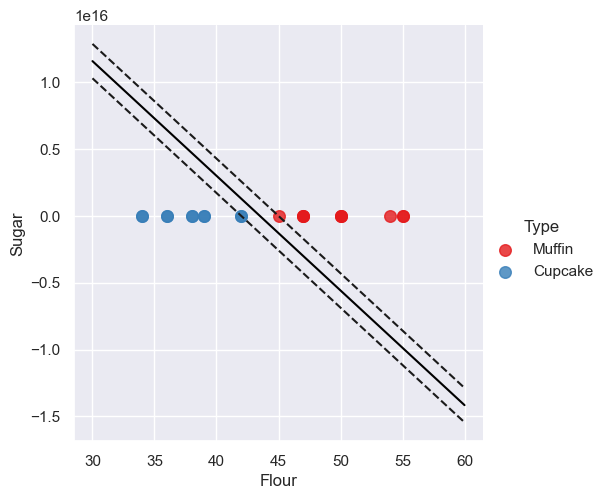

In [8]:
# get the separating hyperplane
w = model.coef_[0]
a = - w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

sns.lmplot(x="Flour", y="Sugar", data=recipes, hue="Type", palette="Set1", fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, "black")
plt.plot(xx, yy_up, "k--")
plt.plot(xx, yy_down, "k--")


In [9]:
def m_or_c(flour, sugar):
    if model.predict([[flour, sugar]]) == 0:
        print("muff")
    else:
        print("cup")


m_or_c(50, 20)

muff


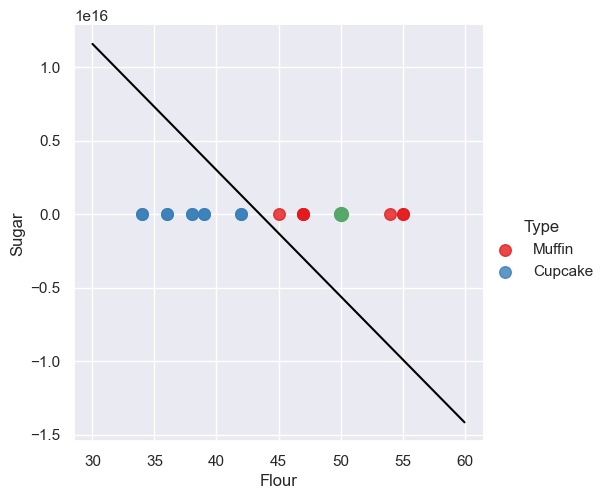

In [10]:
# plot on graph
sns.lmplot(x="Flour", y="Sugar", data=recipes, hue="Type", palette="Set1", fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, "black")
plt.plot(50, 20, "go", markersize=10)

In [11]:
ingredient = recipes[recipe_features].values
model2 = svm.SVC(kernel="poly")

model2.fit(ingredient, type_label)

SVC(kernel='poly')

In [12]:
def m_or_c(rec):
    if model2.predict([rec]) == 0:
        print("muff")
    else:
        print("cup")

m_or_c([1,1,1,1,1,1,1,1])


cup


# calculate again

In [15]:
df = recipes
recipes.tail(10)

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
10,Cupcake,39,0,26,19,14,1,1,0
11,Cupcake,42,21,16,10,8,3,0,0
12,Cupcake,34,17,20,20,5,2,1,0
13,Cupcake,39,13,17,19,10,1,1,0
14,Cupcake,38,15,23,15,8,0,1,0
15,Cupcake,42,18,25,9,5,1,0,0
16,Cupcake,36,14,21,14,11,2,1,0
17,Cupcake,38,15,31,8,6,1,1,0
18,Cupcake,36,16,24,12,9,1,1,0
19,Cupcake,34,17,23,11,13,0,1,0


In [17]:
def muffin_or_cup(x):
    if x == "Muffin":
        return 1
    if x == "Cupcake":
        return 0
df["target"] = df.Type.apply(lambda x: muffin_or_cup(x))

In [33]:
X = df.drop(["Type", "target"], axis="columns")
y = df.target
X

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,55,28,3,7,5,2,0,0
1,47,24,12,6,9,1,0,0
2,47,23,18,6,4,1,0,0
3,45,11,17,17,8,1,0,0
4,50,25,12,6,5,2,1,0
5,55,27,3,7,5,2,1,0
6,54,27,7,5,5,2,0,0
7,47,26,10,10,4,1,0,0
8,50,17,17,8,6,1,0,0
9,50,17,17,11,4,1,0,0


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(len(X_train),len(X_test))

16 4


In [35]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
print(model.score(X_test,y_test))


1.0


In [36]:
model.predict([[22,3,44,5,66,7,88,9]])

D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)